In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Perceptron Learning Rule and Its Theory

## Introduction
One of the questions raised in Chapter 3 was: *“How do we determine the weight matrix and bias for perceptron networks with many inputs, where it is impossible to visualize the decision boundaries?”* In this chapter, we will describe an algorithm for training perceptron networks so that they can learn to solve classification problems.

We will begin by explaining what a learning rule is and then develop the perceptron learning rule. We will conclude by discussing the advantages and limitations of the single-layer perceptron network, leading us into future chapters.

## Theory and Examples
In 1943, Warren McCulloch and Walter Pitts introduced one of the first artificial neurons [McPi43]. The main feature of their neuron model is that a weighted sum of input signals is compared to a threshold to determine the neuron output. 

When the sum is greater than or equal to the threshold, the output is 1. When the sum is less than the threshold, the output is 0. They showed that networks of these neurons could, in principle, compute any arithmetic or logical function. 

Unlike biological networks, the parameters of their networks had to be designed, as no training method was available. However, the perceived connection between biology and digital computers generated great interest.

In the late 1950s, Frank Rosenblatt and several other researchers developed a class of neural networks called perceptrons. The neurons in these networks were similar to those of McCulloch and Pitts. Rosenblatt's key contribution was the introduction of a learning rule for training perceptron networks to solve pattern recognition problems [Rose58]. He proved that his learning rule will always converge to the correct network weights, if weights exist that solve the problem. 

Learning was simple and automatic. Examples of proper behavior were presented to the network, which learned from its mistakes. The perceptron could even learn when initialized with random values for its weights and biases.

Unfortunately, the perceptron network is inherently limited. These limitations were widely publicized in the book *Perceptrons* [MiPa69] by Marvin Minsky and Seymour Papert. They demonstrated that the perceptron networks were incapable of implementing certain elementary functions. 

It was not until the 1980s that these limitations were overcome with improved (multilayer) perceptron networks and associated learning rules. We will discuss these improvements in Chapters 11 and 12. 

Today, the perceptron is still viewed as an important network. It remains a fast and reliable network for the class of problems that it can solve. In addition, an understanding of the operations of the perceptron provides a good basis for understanding more complex networks. 

Thus, the perceptron network and its associated learning rule are well worth discussing here.

## Learning Rules
As we begin our presentation of the perceptron learning rule, we want to discuss learning rules in general. 

By *learning rule* we mean a procedure for modifying the weights and biases of a network. (This procedure may also be referred to as a training algorithm.) The purpose of the learning rule is to train the network to perform some task. 

There are many types of neural network learning rules. They fall into three broad categories:

1. **Supervised Learning**
   
   In supervised learning, the learning rule is provided with a set of examples (the training set) of proper network behavior:
   
   
   
   $$
   \{p_1, t_1\}, \{p_2, t_2\}, \ldots, \{p_Q, t_Q\}
   $$
   where \( p_q \) is an input to the network and \( t_q \) is the corresponding correct (target) output. As the inputs are applied to the network, the network outputs are compared to the targets. The learning rule is then used to adjust the weights and biases of the network in order to move the network outputs closer to the targets. 

   The perceptron learning rule falls into this supervised learning category. We will also investigate supervised learning algorithms in Chapters 7–14.

2. **Reinforcement Learning**
   
   Reinforcement learning is similar to supervised learning, except that, instead of being provided with the correct output for each network input, the algorithm is only given a grade. 

   The grade (or score) is a measure of the network performance over some sequence of inputs. This type of learning is currently much less common than supervised learning. It appears to be most suited to control system applications (see [BaSu83], [WhSo92]).

3. **Unsupervised Learning**

   In unsupervised learning, the weights and biases are modified in response to network inputs only. There are no target outputs available. At first glance, this might seem impractical. How can you train a network if you don’t know what it is supposed to do? Most of these algorithms perform some kind of clustering operation. 

   They learn to categorize the input patterns into a finite number of classes. This is especially useful in such applications as vector quantization. We will see in Chapters 15–19 that there are a number of unsupervised learning algorithms.



# Perceptron Network and Learning Rule

Before we present the perceptron learning rule, let’s expand our investigation of the perceptron network, which we began in Chapter 3. The general perceptron network is shown in **Fig. 1**. 



The output of the network is given by:
$$
a = \text{hardlim}( Wp + b )
\tag{4.2}
$$

(Note: In Chapter 3, we used the `hardlims` transfer function, instead of `hardlim`. This does not affect the capabilities of the network. )

### Perceptron Network Diagram

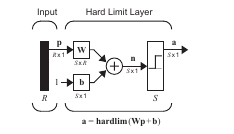
Fig. 1. Perceptron Network

- **Input**: $ p \in \mathbb{R}^{R \times 1} $  
- **Weight Matrix**: $ W \in \mathbb{R}^{S \times R} $  
- **Bias Vector**: $ b \in \mathbb{R}^{S \times 1} $  
- **Network Output**: $ a \in \mathbb{R}^{S \times 1} $4

The output is calculated as:
$$
a = \text{hardlim}( Wp + b )
$$

#### Matrix Representation:

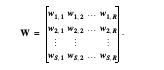

Let’s break down the weight matrix $ W $:
$$
W = \begin{pmatrix}
w_{1, 1} & w_{1, 2} & \cdots & w_{1, R} \\
w_{2, 1} & w_{2, 2} & \cdots & w_{2, R} \\
\vdots & \vdots & \ddots & \vdots \\
w_{S, 1} & w_{S, 2} & \cdots & w_{S, R}
\end{pmatrix}
\tag{4.3}
$$

We define the $ i $-th row of the weight matrix as a vector:
$$
w_i = \begin{pmatrix}
w_{i, 1} \\
w_{i, 2} \\
\vdots \\
w_{i, R}
\end{pmatrix}
\tag{4.4}
$$

Thus, we can represent the weight matrix $ W $ as:
$$
W = \begin{pmatrix}
w_1^T \\
w_2^T \\
\vdots \\
w_S^T
\end{pmatrix}
\tag{4.5}
$$

### Network Output for Individual Neurons
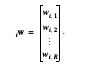

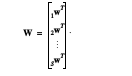


The output of the \( i \)-th neuron can be written as:
$$
a_i = \text{hardlim}(n_i) = \text{hardlim}(w_i^T p + b_i)
\tag{4.6}
$$

#### Hardlim Transfer Function

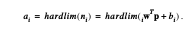

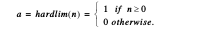

The hardlim function is defined as:
$$
a = \text{hardlim}(n) = 
\begin{cases} 
1 & \text{if } n \geq 0 \\
0 & \text{otherwise} 
\end{cases}
\tag{4.7}
$$

Therefore, if the inner product of the $ i $-th row of the weight matrix with the input vector is greater than or equal to $ -b_i $, the output will be 1. Otherwise, the output will be 0.

### Investigating Decision Boundaries
Each neuron in the network divides the input space into two regions based on this rule. To investigate these boundaries, we will begin with the simple case of a single-neuron perceptron with two inputs.

- **Decision Boundary**: The boundary between regions where $ a = 0 $ and $ a = 1 $ is determined by:
$$
w_1 p_1 + w_2 p_2 + b = 0
$$
For the perceptron with two inputs, this represents a linear decision boundary in the input space.







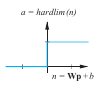



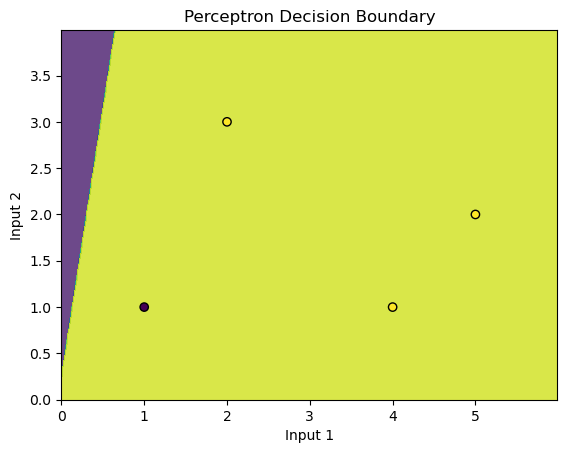

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the hardlim (step) function
def hardlim(n):
    return np.where(n >= 0, 1, 0)

# Perceptron model
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.W = np.random.randn(input_size + 1)  # Including bias as part of the weight vector
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Perceptron training method
    def train(self, X, y):
        X = np.insert(X, 0, 1, axis=1)  # Insert bias term (x0 = 1) into input data
        for epoch in range(self.epochs):
            for i in range(len(X)):
                net_input = np.dot(X[i], self.W)
                output = hardlim(net_input)
                error = y[i] - output
                self.W += self.learning_rate * error * X[i]  # Update rule
        return self.W

    # Prediction function
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)  # Insert bias term (x0 = 1)
        net_input = np.dot(X, self.W)
        return hardlim(net_input)

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Create a grid and classify points in it
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Perceptron Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Training data (X: features, y: labels)
    X = np.array([[2, 3], [1, 1], [4, 1], [5, 2]])  # Inputs
    y = np.array([1, 0, 1, 1])  # Target outputs (labels)

    # Initialize the Perceptron model
    perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=20)

    # Train the perceptron model
    perceptron.train(X, y)

    # Plot the decision boundary
    plot_decision_boundary(X, y, perceptron)


Inputs Two-Input Neuron 

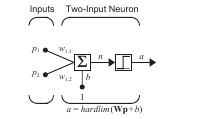
 Fig. 2. Two-Input/Single-Output Perceptron
 
 # Single-Neuron Perceptron

In this section, we will consider a two-input perceptron with a single neuron.

### Network Equation

The output of the network is given by:

$$
a = \text{hardlim}(n) = \text{hardlim}(Wp + b)
$$

where:

- $ W $ is the weight matrix,
- $ p $ is the input vector, and
- $ b $ is the bias.

For a two-input perceptron, this becomes:

$$
a = \text{hardlim}(w_{1,1}p_1 + w_{1,2}p_2 + b)
$$

### Decision Boundary

The decision boundary is determined by the input vectors for which the net input $ n $ is zero:



$$
n = w_{1,1}p_1 + w_{1,2}p_2 + b = 0
$$

Let's assign the following values for the weights and bias:

$$
w_{1,1} = 1, \quad w_{1,2} = 1, \quad b = -1
$$

Substituting these into the equation for the decision boundary:

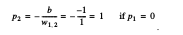




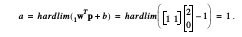


$$
p_1 + p_2 - 1 = 0
$$

This defines a line in the input space. On one side of the line, the output will be 0, and on the other side, the output will be 1.

### Intercepts

To draw the decision boundary line, we find the intercepts with the $ p_1 $- and $ p_2 $-axes.

1. **$ p_2 $-intercept**: Set $ p_1 = 0 $:

$$
p_2 = \frac{-b}{w_{1,2}} = \frac{-(-1)}{1} = 1
$$

2. **\( p_1 \)-intercept**: Set \( p_2 = 0 \):

$$
p_1 = \frac{-b}{w_{1,1}} = \frac{-(-1)}{1} = 1
$$

Thus, the decision boundary is a straight line passing through $ (1,0) $ and $ (0,1) $.

### Testing a Point

To find out which side of the boundary corresponds to an output of 1, we test the point $ p = \begin{bmatrix} 2 \\ 0 \end{bmatrix} $:

$$
a = \text{hardlim}(W p + b) = \text{hardlim}(1 \cdot 2 + 1 \cdot 0 - 1) = \text{hardlim}(1) = 1
$$

Therefore, the output will be 1 for the region above and to the right of the decision boundary.

### Final Equation

The decision boundary is given by:

$$
p_1 + p_2 - 1 = 0
$$

 
 
 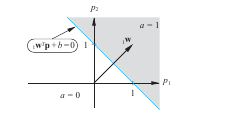
 Fig. 3. Decision Boundary for Two-Input Perceptron
 
 
 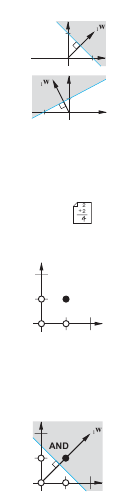
 
 # Perceptron Network: Decision Boundary and AND Gate Example

### Decision Boundary
We can also find the decision boundary graphically. The boundary is always orthogonal to the weight vector $ \mathbf{w}_1 $, and it is defined by:

$$
\mathbf{w}_1^T \mathbf{p} + b = 0
$$

For all points on the boundary, the inner product of the input vector with the weight vector is the same. This implies that these input vectors have the same projection onto the weight vector, and they must lie on a line orthogonal to the weight vector. Vectors in the region where the perceptron outputs 1 will have an inner product greater than $ -b $, and vectors in the region where the output is 0 will have an inner product less than $ -b $.

Thus, the weight vector $ \mathbf{w}_1 $ will always point toward the region where the neuron output is 1.

---

### Perceptron for the AND Gate
Let's apply this concept to design a perceptron network for the AND logic function. The input/target pairs for the AND gate are:

$$
\{(0, 0), 0\}, \quad \{(1, 0), 0\}, \quad \{(0, 1), 0\}, \quad \{(1, 1), 1\}
$$

#### Step 1: Choosing the Decision Boundary
We want to select a line that separates the outputs where the target is 0 (light circles) and where the target is 1 (dark circles). One reasonable choice is to select a line that falls halfway between the two categories, as illustrated below.

#### Step 2: Choosing the Weight Vector
We want the weight vector to be orthogonal to the decision boundary. One possible choice is:

$$
\mathbf{w}_1 = \begin{bmatrix} 2 \\ 2 \end{bmatrix}
$$

#### Step 3: Finding the Bias
Next, we compute the bias by selecting a point on the decision boundary and using the equation:

$$
\mathbf{w}_1^T \mathbf{p} + b = 0
$$

Let's choose $ \mathbf{p} = \begin{bmatrix} 1.5 \\ 0 \end{bmatrix} $:

$$
2 \cdot 1.5 + 2 \cdot 0 + b = 0
$$

Solving for $ b $:

$$
3 + b = 0 \implies b = -3
$$

---

### Testing the Perceptron Network
Now, we can test the network with one of the input/target pairs. For the input $ \mathbf{p}_2 = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $:

$$
a = \text{hardlim}(\mathbf{w}_1^T \mathbf{p}_2 + b) = \text{hardlim}\left(2 \cdot 1 + 2 \cdot 0 - 3\right) = \text{hardlim}(-1) = 0
$$

This is equal to the target output $ t_2 = 0 $.

#### Verify Classification
Verify that all inputs are correctly classified by the network.

---

### Multiple-Neuron Perceptron
For perceptrons with multiple neurons, each neuron will have its own decision boundary. The decision boundary for the $ i $-th neuron is defined by:

$$
\mathbf{w}_i^T \mathbf{p} + b_i = 0
$$

A single-neuron perceptron classifies input vectors into two categories (output 0 or 1). A multiple-neuron perceptron can classify inputs into many categories, where each category is represented by a different output vector. If there are $ S $ neurons, the number of possible categories is $ 2^S $.


Predictions: [0 0 0 1]


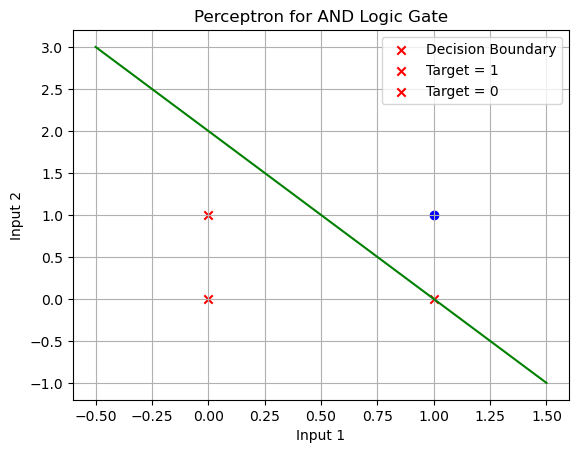

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Hard limit function for binary output
def hardlim(n):
    return np.where(n >= 0, 1, 0)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    # Training function
    def train(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Perceptron learning rule
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = hardlim(linear_output)
                
                # Update rule
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    # Predict function
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return hardlim(linear_output)

# Create dataset for AND logic gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # Target outputs for AND gate

# Initialize perceptron
p = Perceptron(learning_rate=0.1, epochs=10)

# Train the perceptron on the dataset
p.train(X, y)

# Test the perceptron
predictions = p.predict(X)
print("Predictions:", predictions)

# Plotting decision boundary
fig, ax = plt.subplots()

# Plot data points
for i in range(len(X)):
    if y[i] == 1:
        ax.scatter(X[i][0], X[i][1], marker='o', color='b')
    else:
        ax.scatter(X[i][0], X[i][1], marker='x', color='r')

# Plot decision boundary
x1 = np.linspace(-0.5, 1.5, 100)
x2 = -(p.weights[0] * x1 + p.bias) / p.weights[1]
plt.plot(x1, x2, color='green', label='Decision Boundary')

# Labels and title
plt.title("Perceptron for AND Logic Gate")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend(["Decision Boundary", "Target = 1", "Target = 0"])
plt.grid(True)
plt.show()


## Perceptron Learning Rule

The perceptron learning rule is an example of **supervised training**, where the learning rule is provided with a set of examples of proper network behavior:

$$ \{(p_1, t_1), (p_2, t_2), \dots, (p_Q, t_Q)\} $$

where $ p_q $ is an input to the network and $ t_q $ is the corresponding target output. The learning rule adjusts the weights and biases of the network to move the output closer to the target.

### Test Problem

Consider the following input/target pairs for a simple test problem:

$$
p_1 = \begin{bmatrix} 1 \\ 2 \end{bmatrix}, t_1 = 1 
$$
$$
p_2 = \begin{bmatrix} -1 \\ 2 \end{bmatrix}, t_2 = 0 
$$
$$
p_3 = \begin{bmatrix} 0 \\ -1 \end{bmatrix}, t_3 = 0 
$$

The problem can be displayed graphically with two input vectors whose target is $0$ (light circles) and one input vector whose target is $1$ (dark circle).

### Network Without Bias

We will start with a network that has **two inputs and one output**, but no bias. The network has just two parameters: $ w_{1,1} $ and $ w_{1,2} $, as shown below:

$$ a = \text{hardlim}(Wp) $$

The absence of a bias means that the decision boundary must pass through the origin. Our goal is to find a decision boundary that can separate the vectors $ p_2 $ and $ p_3 $ from $ p_1 $. There are infinite solutions, as seen in the figure.

The weight vectors that correspond to allowable decision boundaries are orthogonal to the boundary. The **length** of the weight vector does not matter, only its **direction** is important.

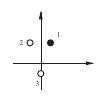

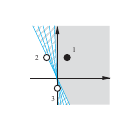

### Initializing Weights

Training begins by assigning initial values to the network parameters. The initial weight vector $ w_1 $ is randomly generated as:


$$ w_1 = \begin{bmatrix} 1.0 \\ -0.8 \end{bmatrix} $$

### Updating Weights

We start by presenting the input vector $ p_1 $:

$$
a = \text{hardlim}(w_1^T p_1) = \text{hardlim} \left( \begin{bmatrix} 1.0 & -0.8 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \end{bmatrix} \right) = \text{hardlim}(-0.6) = 0
$$

The network incorrectly returns $0$ when the target is $1$. The weight vector results in a decision boundary that incorrectly classifies $ p_1 $. To correct this, we need to adjust $ w_1 $ so that it points more toward $ p_1 $.

One possible rule would be to add $ p_1 $ to $ w_1 $, which will move $ w_1 $ closer to the direction of $ p_1 $. Repeated presentations of $ p_1 $ will asymptotically bring $ w_1 $ closer to $ p_1 $'s direction. The rule is:

$$ w_1^{\text{new}} = w_1^{\text{old}} + p_1 \quad \text{if} \quad t = 1 \quad \text{and} \quad a = 0 $$


## Perceptron Learning Rule Applied to the Test Problem

### Update Weights with $ p_1 $

After applying the rule to the first input $ p_1 $, the new weight vector $ w_1 $ is calculated as:

$$
w_1^{\text{new}} = w_1^{\text{old}} + p_1 = \begin{bmatrix} 1.0 \\ -0.8 \end{bmatrix} + \begin{bmatrix} 1 \\ 2 \end{bmatrix} = \begin{bmatrix} 2.0 \\ 1.2 \end{bmatrix}
$$

### Update Weights with $ p_2 $

Next, we present the input vector $ p_2 $. When $ p_2 $ is presented to the network, we compute:

$$
a = \text{hardlim}(w_1^T p_2) = \text{hardlim}\left( \begin{bmatrix} 2.0 & 1.2 \end{bmatrix} \begin{bmatrix} -1 \\ 2 \end{bmatrix} \right) = \text{hardlim}(0.4) = 1
$$

The target $ t_2 $ is 0, but the output $ a $ is 1, so we misclassified $ p_2 $. Therefore, we need to subtract $ p_2 $ from $ w_1 $:

$$
w_1^{\text{new}} = w_1^{\text{old}} - p_2 = \begin{bmatrix} 2.0 \\ 1.2 \end{bmatrix} - \begin{bmatrix} -1 \\ 2 \end{bmatrix} = \begin{bmatrix} 3.0 \\ -0.8 \end{bmatrix}
$$

### Update Weights with $ p_3 $

Now, we present the third vector $ p_3 $:

$$
a = \text{hardlim}(w_1^T p_3) = \text{hardlim}\left( \begin{bmatrix} 3.0 & -0.8 \end{bmatrix} \begin{bmatrix} 0 \\ -1 \end{bmatrix} \right) = \text{hardlim}(0.8) = 1
$$

Again, we misclassified $ p_3 $, so we update $ w_1 $ as:

$$
w_1^{\text{new}} = w_1^{\text{old}} - p_3 = \begin{bmatrix} 3.0 \\ -0.8 \end{bmatrix} - \begin{bmatrix} 0 \\ -1 \end{bmatrix} = \begin{bmatrix} 3.0 \\ 0.2 \end{bmatrix}
$$

### Final Rule

At this point, the perceptron has learned to correctly classify all three input vectors. The final rule is simple:

$$
w_1^{\text{new}} = w_1^{\text{old}} \quad \text{if} \quad t = a
$$

### Unified Learning Rule

We can generalize the rules into one equation by defining the perceptron error \( e \):

$$
e = t - a
$$

The unified learning rule becomes:

$$
w_1^{\text{new}} = w_1^{\text{old}} + e p = w_1^{\text{old}} + (t - a)p
$$

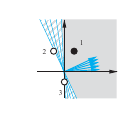

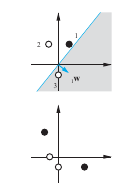

### Update Bias

This rule can be extended to train the bias, noting that bias is just a weight with a constant input of 1:

$$
b^{\text{new}} = b^{\text{old}} + e
$$

### Perceptron Rule in Matrix Notation

For a multiple-neuron perceptron, we can update the weight matrix $ W $ and the bias $ b $ as follows:

$$
W^{\text{new}} = W^{\text{old}} + e p^T
$$

$$
b^{\text{new}} = b^{\text{old}} + e
$$

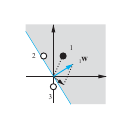


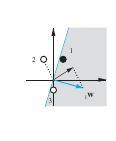
### Example: Apple/Orange Classification

Consider the apple/orange recognition problem, with input/output prototype vectors:

$$
p_1 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}, \quad t_1 = 0 \quad \text{(orange)}
$$

$$
p_2 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}, \quad t_2 = 1 \quad \text{(apple)}
$$

Suppose the weights and biases are initialized as:

$$
W = \begin{bmatrix} 0.5 & -1 & -0.5 \end{bmatrix}, \quad b = 0.5
$$

Applying the first input vector \( p_1 \):

$$
a = \text{hardlim}(W p_1 + b) = \text{hardlim} \left( \begin{bmatrix} 0.5 & -1 & -0.5 \end{bmatrix} \begin{bmatrix} 1 \\ -1 \end{bmatrix} + 0.5 \right) = \text{hardlim}(2.5) = 1
$$

## Training Multiple-Neuron Perceptrons

The perceptron rule, as given by Eqs. (4.34) and (4.35), updates the weight vector of a single-neuron perceptron. We can generalize this rule for the multiple-neuron perceptron as follows:

### Update the \(i\)-th row of the weight matrix:
$$
w_i^{\text{new}} = w_i^{\text{old}} + e_i p
$$
(Equation 4.36)

### Update the \(i\)-th element of the bias vector:
$$
b_i^{\text{new}} = b_i^{\text{old}} + e_i
$$
(Equation 4.37)

### Perceptron Rule in Matrix Notation:

The perceptron rule can be written in matrix notation as:
$$
W^{\text{new}} = W^{\text{old}} + e p^T
$$
(Equation 4.38)

And for the bias:
$$
b^{\text{new}} = b^{\text{old}} + e
$$
(Equation 4.39)

### Example: Apple/Orange Recognition

Consider the input/output prototype vectors:
$$
p_1 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}, \quad t_1 = 0
$$
$$
p_2 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}, \quad t_2 = 1
$$
(Equation 4.40)

We initialize the weight matrix and bias with random small values:
$$
W = \begin{bmatrix} 0.5 & -1 & -0.5 \end{bmatrix}, \quad b = 0.5
$$
(Equation 4.41)

### First Iteration:

We apply the first input vector $p_1$ to the network:
$$
a = \text{hardlim}(Wp_1 + b) = \text{hardlim} \left( \begin{bmatrix} 0.5 & -1 & -0.5 \end{bmatrix} \begin{bmatrix} 1 \\ -1 \end{bmatrix} + 0.5 \right) = \text{hardlim}(2.5) = 1
$$
(Equation 4.42)

Calculate the error:
$$
e = t_1 - a = 0 - 1 = -1
$$
(Equation 4.43)

Update the weights:
$$
W^{\text{new}} = W^{\text{old}} + e p^T = \begin{bmatrix} 0.5 & -1 & -0.5 \end{bmatrix} + (-1) \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \begin{bmatrix} -0.5 & 0 & 0.5 \end{bmatrix}
$$
(Equation 4.44)

Update the bias:
$$
b^{\text{new}} = b^{\text{old}} + e = 0.5 + (-1) = -0.5
$$
(Equation 4.45)

### Second Iteration:

Apply the second input vector $p_2$ to the network:
$$
a = \text{hardlim}(Wp_2 + b) = \text{hardlim} \left( \begin{bmatrix} -0.5 & 0 & 0.5 \end{bmatrix} \begin{bmatrix} 1 \\ -1 \end{bmatrix} + (-0.5) \right) = \text{hardlim}(-0.5) = 0
$$
(Equation 4.46)

Calculate the error:
$$
e = t_2 - a = 1 - 0 = 1
$$
(Equation 4.47)

Update the weights:
$$
W^{\text{new}} = W^{\text{old}} + e p^T = \begin{bmatrix} -0.5 & 0 & 0.5 \end{bmatrix} + 1 \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \begin{bmatrix} 0.5 & 1 & -0.5 \end{bmatrix}
$$
(Equation 4.48)

Update the bias:
$$
b^{\text{new}} = b^{\text{old}} + e = -0.5 + 1 = 0.5
$$
(Equation 4.49)

### Third Iteration:

Apply the first input vector $p_1$ again:
$$
a = \text{hardlim}(Wp_1 + b) = \text{hardlim} \left( \begin{bmatrix} 0.5 & 1 & -0.5 \end{bmatrix} \begin{bmatrix} 1 \\ -1 \end{bmatrix} + 0.5 \right) = \text{hardlim}(0.5) = 1
$$
(Equation 4.50)

Calculate the error:
$$
e = t_1 - a = 0 - 1 = -1
$$
(Equation 4.51)

Update the weights:
$$
W^{\text{new}} = W^{\text{old}} + e p^T = \begin{bmatrix} 0.5 & 1 & -0.5 \end{bmatrix} + (-1) \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \begin{bmatrix} -0.5 & 2 & 0.5 \end{bmatrix}
$$
(Equation 4.52)

Update the bias:
$$
b^{\text{new}} = b^{\text{old}} + e = 0.5 + (-1) = -0.5
$$
(Equation 4.53)

### Conclusion:

Continuing this process, you will find that the algorithm converges and correctly classifies both input vectors. The decision boundary learned by this perceptron may differ from that of Chapter 3, but both will correctly classify the inputs.



In [3]:
import numpy as np

class Perceptron:
    def __init__(self, input_size):
        # Initialize weights and bias
        self.W = np.random.rand(input_size) * 0.1  # Small random weights
        self.b = np.random.rand() * 0.1  # Small random bias

    def hardlim(self, x):
        # Hard limit activation function
        return np.where(x > 0, 1, 0)

    def predict(self, X):
        # Compute the weighted sum and apply activation function
        return self.hardlim(np.dot(X, self.W) + self.b)

    def update_weights(self, X, e):
        # Update weights and bias based on the perceptron rule
        self.W += e * X
        self.b += e

    def train(self, X, T, epochs=10):
        # Training the perceptron
        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}")
            for x, t in zip(X, T):
                a = self.predict(x)  # Activation output
                e = t - a  # Compute error
                self.update_weights(x, e)  # Update weights and bias
                print(f"Input: {x}, Target: {t}, Prediction: {a}, Error: {e}")
            print(f"Weights: {self.W}, Bias: {self.b}\n")

# Example: Apple/Orange Recognition
if __name__ == "__main__":
    # Input vectors and target values (0 for orange, 1 for apple)
    X = np.array([
        [1, -1],  # p1: Orange
        [1, 1]    # p2: Apple
    ])
    T = np.array([0, 1])  # Target values

    # Create a Perceptron instance
    perceptron = Perceptron(input_size=X.shape[1])

    # Train the perceptron
    perceptron.train(X, T, epochs=5)

    # Test the perceptron with both input vectors
    for x in X:
        prediction = perceptron.predict(x)
        print(f"Input: {x}, Predicted: {prediction}")


Epoch 1
Input: [ 1 -1], Target: 0, Prediction: 1, Error: -1
Input: [1 1], Target: 1, Prediction: 0, Error: 1
Weights: [0.0695181  2.03360413], Bias: 0.08138250326455465

Epoch 2
Input: [ 1 -1], Target: 0, Prediction: 0, Error: 0
Input: [1 1], Target: 1, Prediction: 1, Error: 0
Weights: [0.0695181  2.03360413], Bias: 0.08138250326455465

Epoch 3
Input: [ 1 -1], Target: 0, Prediction: 0, Error: 0
Input: [1 1], Target: 1, Prediction: 1, Error: 0
Weights: [0.0695181  2.03360413], Bias: 0.08138250326455465

Epoch 4
Input: [ 1 -1], Target: 0, Prediction: 0, Error: 0
Input: [1 1], Target: 1, Prediction: 1, Error: 0
Weights: [0.0695181  2.03360413], Bias: 0.08138250326455465

Epoch 5
Input: [ 1 -1], Target: 0, Prediction: 0, Error: 0
Input: [1 1], Target: 1, Prediction: 1, Error: 0
Weights: [0.0695181  2.03360413], Bias: 0.08138250326455465

Input: [ 1 -1], Predicted: 0
Input: [1 1], Predicted: 1


Epoch 1
Input: [ 1 -1], Target: 0, Prediction: 1, Error: -1
Input: [1 1], Target: 1, Prediction: 0, Error: 1
Weights: [0.06828669 2.07517361], Bias: 0.03449720585875482

Epoch 2
Input: [ 1 -1], Target: 0, Prediction: 0, Error: 0
Input: [1 1], Target: 1, Prediction: 1, Error: 0
Weights: [0.06828669 2.07517361], Bias: 0.03449720585875482

Epoch 3
Input: [ 1 -1], Target: 0, Prediction: 0, Error: 0
Input: [1 1], Target: 1, Prediction: 1, Error: 0
Weights: [0.06828669 2.07517361], Bias: 0.03449720585875482

Epoch 4
Input: [ 1 -1], Target: 0, Prediction: 0, Error: 0
Input: [1 1], Target: 1, Prediction: 1, Error: 0
Weights: [0.06828669 2.07517361], Bias: 0.03449720585875482

Epoch 5
Input: [ 1 -1], Target: 0, Prediction: 0, Error: 0
Input: [1 1], Target: 1, Prediction: 1, Error: 0
Weights: [0.06828669 2.07517361], Bias: 0.03449720585875482

Epoch 6
Input: [ 1 -1], Target: 0, Prediction: 0, Error: 0
Input: [1 1], Target: 1, Prediction: 1, Error: 0
Weights: [0.06828669 2.07517361], Bias: 0.0344

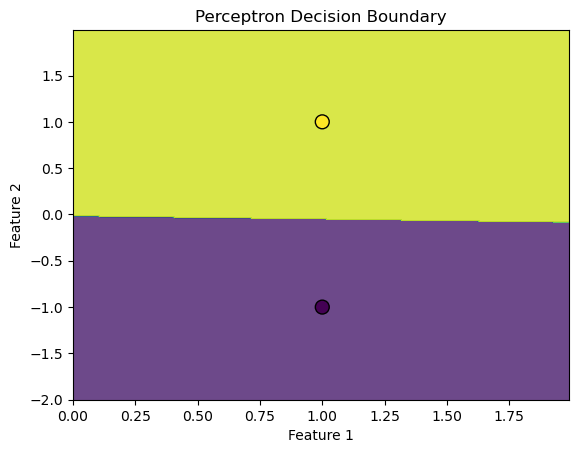

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size):
        # Initialize weights and bias
        self.W = np.random.rand(input_size) * 0.1  # Small random weights
        self.b = np.random.rand() * 0.1  # Small random bias

    def hardlim(self, x):
        # Hard limit activation function
        return np.where(x > 0, 1, 0)

    def predict(self, X):
        # Compute the weighted sum and apply activation function
        return self.hardlim(np.dot(X, self.W) + self.b)

    def update_weights(self, X, e):
        # Update weights and bias based on the perceptron rule
        self.W += e * X
        self.b += e

    def train(self, X, T, epochs=10):
        # Training the perceptron
        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}")
            for x, t in zip(X, T):
                a = self.predict(x)  # Activation output
                e = t - a  # Compute error
                self.update_weights(x, e)  # Update weights and bias
                print(f"Input: {x}, Target: {t}, Prediction: {a}, Error: {e}")
            print(f"Weights: {self.W}, Bias: {self.b}\n")

    def plot_decision_boundary(self, X, T):
        # Create a grid to plot the decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        
        # Predict for each point in the grid
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary and training points
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=T, edgecolors='k', marker='o', s=100)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Perceptron Decision Boundary')
        plt.show()

# Example: Apple/Orange Recognition
if __name__ == "__main__":
    # Input vectors and target values (0 for orange, 1 for apple)
    X = np.array([
        [1, -1],  # p1: Orange
        [1, 1]    # p2: Apple
    ])
    T = np.array([0, 1])  # Target values

    # Create a Perceptron instance
    perceptron = Perceptron(input_size=X.shape[1])

    # Train the perceptron
    perceptron.train(X, T, epochs=10)

    # Test the perceptron with both input vectors
    for x in X:
        prediction = perceptron.predict(x)
        print(f"Input: {x}, Predicted: {prediction}")

    # Plot the decision boundary
    perceptron.plot_decision_boundary(X, T)


# Proof of Convergence of the Perceptron Learning Rule

Although the perceptron learning rule is simple, it is quite powerful. In fact, it can be shown that the rule will always converge to weights that accomplish the desired classification (assuming that such weights exist). In this section, we present a proof of convergence for the perceptron learning rule for the single-neuron perceptron shown in Figure 4.5.

## Single-Neuron Perceptron

The output of this perceptron is obtained from 

$$
a = \text{hardlim} (1 \cdot \mathbf{w}^T \mathbf{p} + b) \tag{4.54}
$$

The network is provided with the following examples of proper network behavior:

$$
\{ \mathbf{p}_1, t_1 \}, \{ \mathbf{p}_2, t_2 \}, \ldots, \{ \mathbf{p}_Q, t_Q \} \tag{4.55}
$$

where each target output $ t_q $ is either 0 or 1.

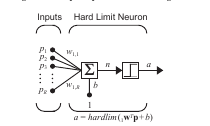

Fig. 5. Single-Neuron Perceptron

## Notation

To conveniently present the proof, we will first introduce some new notation. We will combine the weight matrix and the bias into a single vector:

$$
\mathbf{x} = 
\begin{bmatrix}
\mathbf{w} \\
b
\end{bmatrix} \tag{4.56}
$$

We will also augment the input vectors with a 1, corresponding to the bias input:

$$
\mathbf{z}_q = 
\begin{bmatrix}
\mathbf{p}_q \\
1
\end{bmatrix} \tag{4.57}
$$

Now we can express the net input to the neuron as follows:

$$
n = 1 \cdot \mathbf{w} \cdot \mathbf{p} + b = \mathbf{x}^T \mathbf{z} \tag{4.58}
$$

The perceptron learning rule for a single-neuron perceptron can now be written as:

$$
\mathbf{x}^{\text{new}} = \mathbf{x}^{\text{old}} + e \mathbf{z} \tag{4.59}
$$

The error $ e $ can be either 1, -1, or 0. If $ e = 0 $, then no change is made to the weights. If $ e = 1 $, then the input vector is added to the weight vector. If $ e = -1 $, then the negative of the input vector is added to the weight vector.

If we count only those iterations for which the weight vector is changed, the learning rule becomes:

$$
\mathbf{x}(k) = \mathbf{x}(k-1) + \mathbf{z}'(k-1) \tag{4.60}
$$

where \( \mathbf{z}'(k-1) \) is the appropriate member of the set 

$$
\{ \mathbf{z}_1, \mathbf{z}_2, \ldots, \mathbf{z}_Q, -\mathbf{z}_1, -\mathbf{z}_2, \ldots, -\mathbf{z}_Q \} \tag{4.61}
$$

We will assume that a weight vector exists that can correctly categorize all \( Q \) input vectors. This solution will be denoted \( \mathbf{x}^* \). For this weight vector, we will assume that 

$$
\mathbf{x}^T \mathbf{z}_q > \delta > 0 \quad \text{if} \quad t_q = 1, \tag{4.62}
$$

and 

$$
\mathbf{x}^T \mathbf{z}_q < -\delta < 0 \quad \text{if} \quad t_q = 0. \tag{4.63}
$$

## Proof

We are now ready to begin the proof of the perceptron convergence theorem. The objective of the proof is to find upper and lower bounds on the length of the weight vector at each stage of the algorithm. Assume that the algorithm is initialized with the zero weight vector:

$$
\mathbf{x}(0) = 0. \tag{4.64}
$$

Then, after $ k $ iterations (changes to the weight vector), we find from Eq. (4.60):

$$
\mathbf{x}(k) = \mathbf{z}'(0) + \mathbf{z}'(1) + \ldots + \mathbf{z}'(k-1). \tag{4.65}
$$

If we take the inner product of the solution weight vector with the weight vector at iteration \( k \), we obtain:

$$
\mathbf{x}^T \mathbf{x}(k) = \mathbf{x}^T \mathbf{z}'(0) + \mathbf{x}^T \mathbf{z}'(1) + \ldots + \mathbf{x}^T \mathbf{z}'(k-1). \tag{4.66}
$$

From Eq. (4.61) - Eq. (4.63), we can show that:

$$
\mathbf{x}^T \mathbf{z}'(i) > \delta. \tag{4.67}
$$

Therefore:

$$
\mathbf{x}^T \mathbf{x}(k) > k\delta. \tag{4.68}
$$

From the Cauchy-Schwartz inequality, we have:

$$
\left( \mathbf{x}^T \mathbf{x}(k) \right)^2 \leq \|\mathbf{x}^*\|^2 \|\mathbf{x}(k)\|^2. \tag{4.69}
$$

If we combine Eq. (4.67) and Eq. (4.68), we can put a lower bound on the squared length of the weight vector at iteration \$ k $:

$$
\|\mathbf{x}(k)\|^2 \geq \frac{(k\delta)^2}{\|\mathbf{x}^*\|^2}. \tag{4.70}
$$

Next, we want to find an upper bound for the length of the weight vector. We begin by finding the change in the length at iteration $ k $:

$$
\|\mathbf{x}(k)\|^2 = \|\mathbf{x}(k-1)\|^2 + \|\mathbf{z}'(k-1)\|^2 + 2\mathbf{x}(k-1)^T \mathbf{z}'(k-1). \tag{4.71}
$$

Note that $ \mathbf{x}(k-1)^T \mathbf{z}'(k-1) \leq 0 $ since the weights would not be updated unless the previous input vector had been misclassified. Now Eq. (4.71) can be simplified to:

$$
\|\mathbf{x}(k)\|^2 \leq \|\mathbf{x}(k-1)\|^2 + \|\mathbf{z}'(k-1)\|^2. \tag{4.72}
$$

We can repeat this process for \( \|\mathbf{x}(k-1)\|^2, \|\mathbf{x}(k-2)\|^2, \ldots \) to obtain:

$$
\|\mathbf{x}(k)\|^2 \leq \|\mathbf{z}'(0)\|^2 + \|\mathbf{z}'(1)\|^2 + \ldots + \|\mathbf{z}'(k-1)\|^2. \tag{4.73}
$$

If $ \Pi = \max \{ \|\mathbf{z}'(i)\|^2 \} $, this upper bound can be simplified to:

$$
\|\mathbf{x}(k)\|^2 \leq k\Pi. \tag{4.74}
$$

We now have an upper bound (Eq. (4.75)) and a lower bound (Eq. (4.70)) on the squared length of the weight vector at iteration $ k $. If we combine the two inequalities, we find:

$$
\frac{(k\delta)^2}{\|\mathbf{x}^*\|^2} \leq k\Pi \quad \Rightarrow \quad k \leq \frac{\Pi \|\mathbf{x}^*\|^2}{\delta^2}. \tag{4.75}
$$

Thus, $ k $ has an upper bound, meaning that the weights will only be changed a finite number of times. Therefore, the perceptron learning rule will converge in a finite number of iterations. The maximum number of iterations (changes to the weight vector) is inversely related to the square of $ \delta $. This parameter measures how close the solution decision boundary is to the input patterns. This means that if the input classes are difficult to separate (are close to the decision boundary), it will take many iterations for the algorithm to converge.

## Key Assumptions

There are only three key assumptions required for the proof:

1. A solution to the problem exists, so that Eq. (4.66) is satisfied.
2. The weights are only updated when the input vector is misclassified, therefore Eq. (4.72) is satisfied.
3. An upper bound, $ \Pi $, exists for the length of the input vectors.

Because of the generality of the proof, there are many variations of the perceptron learning rule that can also be shown to converge.
Limitations The perceptron learning rule is guaranteed to converge to a solution in a finite number of steps, so long as a solution exists. This brings us to an im- portant question. What problems can a perceptron solve? Recall that a sin-
# Single-Neuron Perceptron and Linearly Separable Problems

The single-neuron perceptron is able to divide the input space into two regions. The boundary between the regions is defined by the equation:

$$
\mathbf{w}^T \mathbf{p} + b = 0 \tag{4.77}
$$

This is a linear boundary (hyperplane). The perceptron can be used to classify input vectors that can be separated by a linear boundary. We call such vectors **linearly separable**. 

## Examples of Linearly Separable Problems

- The logical AND gate is an example of a two-dimensional linearly separable problem.
- The apple/orange recognition problem discussed in Chapter 3 serves as a three-dimensional example.

Unfortunately, many problems are not linearly separable. The classic example is the **XOR gate**. The input/target pairs for the XOR gate are:

$$
\begin{array}{c|c}
\text{Input} & \text{Target} \\
\hline
\mathbf{p}_1 = (0, 0) & t = 0 \\
\mathbf{p}_2 = (0, 1) & t = 1 \\
\mathbf{p}_3 = (1, 0) & t = 1 \\
\mathbf{p}_4 = (1, 1) & t = 0 \\
\end{array}
$$

This problem is illustrated graphically on the left side of Fig. 6., which also shows two other linearly inseparable problems. 

Try drawing a straight line between the vectors with targets of 1 and those with targets of 0 in any of the diagrams of Fig. 6.

## Limitations of the Basic Perceptron

It was the inability of the basic perceptron to solve such simple problems that led, in part, to a reduction in interest in neural network research during the 1970s. 

Rosenblatt had investigated more complex networks, which he felt would overcome the limitations of the basic perceptron, but he was never able to effectively extend the perceptron rule to such networks. 

In Chapter 11, we will introduce multilayer perceptrons, which can solve arbitrary classification problems, and will describe the **backpropagation algorithm**, which can be used to train them.


In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)


In [ ]:
import matplotlib.pyplot as plt

# AND gate data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])  # AND outputs

# XOR gate data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR outputs

# Plotting the AND gate data
plt.scatter(X_and[:, 0], X_and[:, 1], c=y_and, cmap='bwr', edgecolor='k', s=100)
plt.title("AND Gate")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(True)
plt.show()


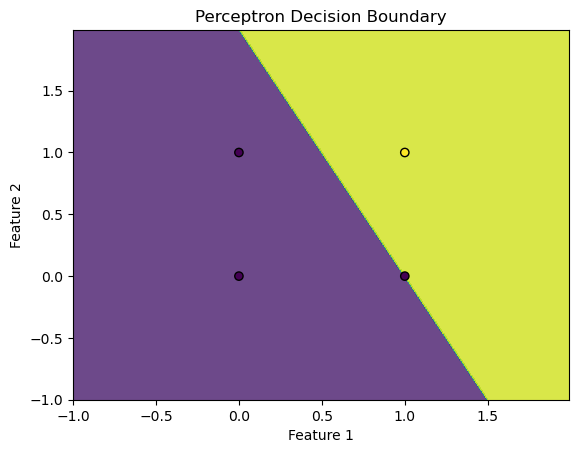

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, max_iter=1000):
        """
        Initialize the Perceptron with a specified learning rate and maximum number of iterations.
        
        Parameters:
        learning_rate (float): The learning rate for weight updates.
        max_iter (int): The maximum number of iterations for training.
        """
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Train the Perceptron using the training data.

        Parameters:
        X (array-like): Training input data.
        y (array-like): Target output values.
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training the perceptron
        for _ in range(self.max_iter):
            for idx, x_i in enumerate(X):
                # Linear output
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Activation (hardlim)
                y_predicted = self._hardlim(linear_output)
                # Update rule
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        """
        Predict the output for the given input data.

        Parameters:
        X (array-like): Input data for predictions.

        Returns:
        array: Predicted output values.
        """
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._hardlim(linear_output)
        return y_predicted

    def _hardlim(self, x):
        """
        Hard limit activation function.

        Parameters:
        x (array-like): Input values.

        Returns:
        array: Output after applying the hard limit function.
        """
        return np.where(x >= 0, 1, 0)

    def plot_decision_boundary(self, X, y):
        """
        Plot the decision boundary of the perceptron.

        Parameters:
        X (array-like): Input data.
        y (array-like): Target output values.
        """
        # Create grid to plot decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        
        # Predictions for the grid
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(grid_points)
        Z = Z.reshape(xx.shape)

        # Plotting
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Perceptron Decision Boundary')
        plt.show()

# Example usage
if __name__ == "__main__":
    # Input data for AND logic gate (linearly separable)
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 0, 0, 1])  # AND outputs

    # Initialize and train the perceptron
    perceptron = Perceptron(learning_rate=0.1, max_iter=10)
    perceptron.fit(X, y)

    # Predict and plot decision boundary
    perceptron.plot_decision_boundary(X, y)
